<a href="https://colab.research.google.com/github/smalvar/CalculadoraAluguel-Novembro/blob/main/2.%20Limpeza%20de%20dados%20e%20EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import pandas as pd

In [239]:
dados = pd.read_csv('https://raw.githubusercontent.com/smalvar/CalculadoraAluguel-Novembro/main/banco_final.csv')

In [240]:
dados = dados.drop(['Unnamed: 0','endereco','rua','bairro'],axis=1)
dados.head()

,aluguel,quartos,banheiro,vaga,area,zona
0,3400,2.0,2.0,1.0,130,Oeste
1,3400,2.0,2.0,2.0,88,Oeste
2,5400,2.0,2.0,1.0,72,Oeste
3,2600,2.0,2.0,1.0,91,Oeste
4,3800,1.0,1.0,1.0,44,Oeste


In [241]:
dados.head()

,aluguel,quartos,banheiro,vaga,area,zona
0,3400,2.0,2.0,1.0,130,Oeste
1,3400,2.0,2.0,2.0,88,Oeste
2,5400,2.0,2.0,1.0,72,Oeste
3,2600,2.0,2.0,1.0,91,Oeste
4,3800,1.0,1.0,1.0,44,Oeste


In [242]:
from sklearn.model_selection import train_test_split

In [243]:
train, test = train_test_split(dados, test_size=0.25, random_state=1, stratify=dados['zona'])

In [244]:
train.head()

,aluguel,quartos,banheiro,vaga,area,zona
504,15000,4.0,6.0,4.0,464,Sul
397,7000,4.0,5.0,3.0,169,Sul
74,8000,3.0,2.0,3.0,280,Oeste
737,850,1.0,1.0,0.0,98,Leste
477,6000,8.0,2.0,8.0,1000,Sul


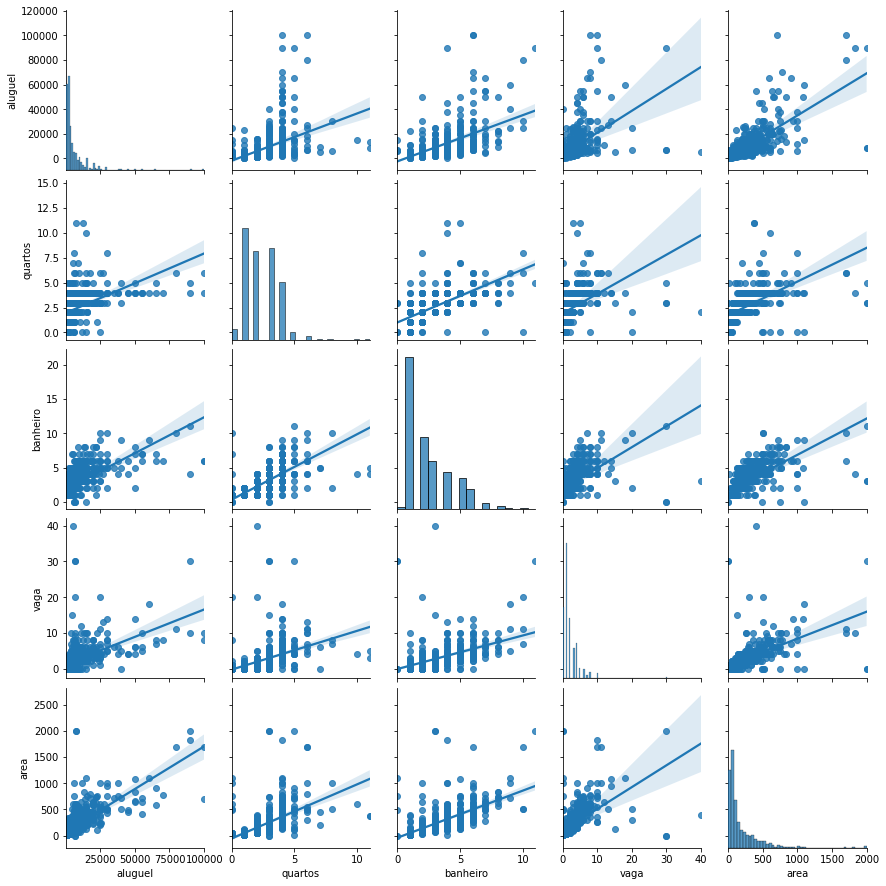

In [245]:
import seaborn as sns
sns.pairplot(train, kind='reg')

In [246]:
import numpy as np
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

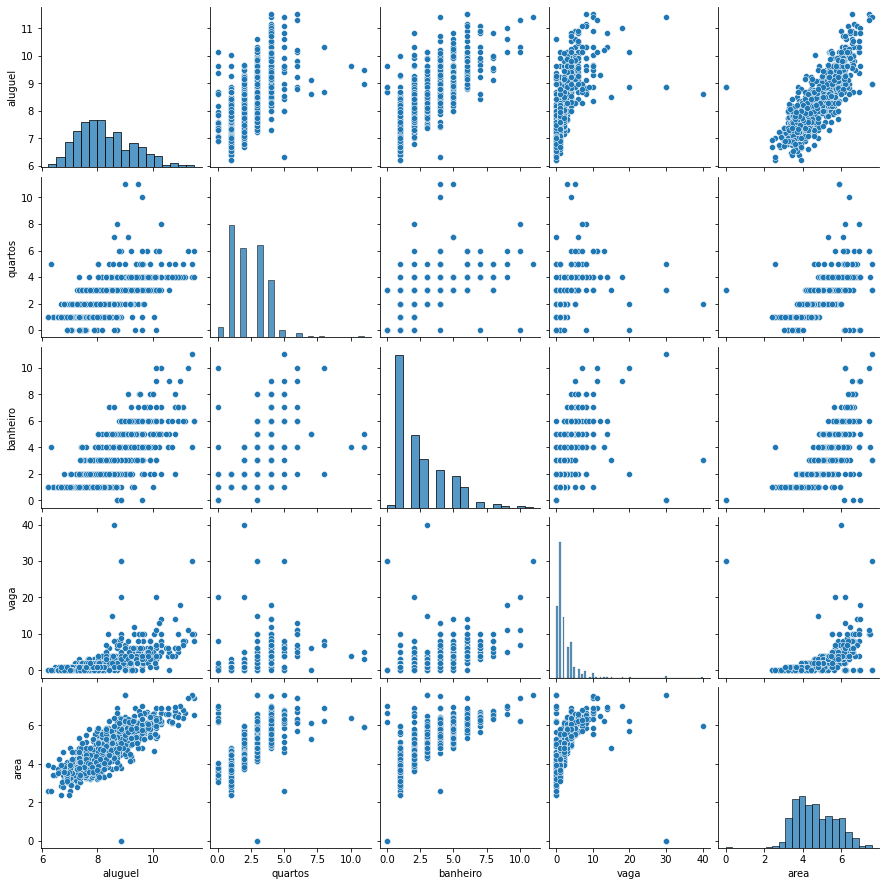

In [247]:
sns.pairplot(train)

In [248]:
X_cols=['zona', 'area', 'quartos','banheiro','vaga']
y_col=['aluguel']

In [249]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [250]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [251]:
X_train.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
504,6.142037,4.0,6.0,4.0,0,0,0,0,1
397,5.135798,4.0,5.0,3.0,0,0,0,0,1
74,5.638355,3.0,2.0,3.0,0,0,0,1,0
737,4.595120,1.0,1.0,0.0,0,1,0,0,0
477,6.908755,8.0,2.0,8.0,0,0,0,0,1


In [252]:
y_train.head()

,aluguel
504,9.615872
397,8.853808
74,8.987322
737,6.746412
477,8.699681


In [253]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [254]:
y_pred = neigh.predict(X_test)

In [255]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.vnp.alues)**2))

0.5838446059869178

In [256]:
# Mean Squared Errorfrom
np.mean((y_pred-y_test.values)**2)

0.34087452394001927

In [257]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.44794482744682146

In [258]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7209396684217904

In [259]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.7533225177776965

In [194]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

regressor_list = [ KNeighborsRegressor(),
                  LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  XGBRegressor(),
                  MLPRegressor(),
                  LGBMRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=5)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando KNeighborsRegressor
Train score 0.7985911413749257
Validation score [0.66945804 0.75771847 0.70358054 0.7286198  0.60056736]
Test score 0.7209396684217904
Treinando LinearRegression
Train score 0.7413310011623597
Validation score [0.69283186 0.79287584 0.72278178 0.76214167 0.64519801]
Test score 0.7533225177776965
Treinando DecisionTreeRegressor
Train score 0.9758351645143398
Validation score [0.58756962 0.64260071 0.60918568 0.41555383 0.55599859]
Test score 0.6691527644812452
Treinando RandomForestRegressor
Train score 0.9462092015319626
Validation score [0.71602509 0.78212148 0.75140881 0.70050711 0.73241725]
Test score 0.7859944681534309
Treinando XGBRegressor
Train score 0.963067093067772
Validation score [0.66998743 0.72722652 0.709267   0.63177384 0.69306464]
Test score 0.7758716402699768
Treinando MLPRegressor
Train score 0.7462128237020197
Validation score [0.702702   0.72370697 0.69003132 0.73355108 0.58028057]
Test score 0.761790330502907
Treinando LGBMRegressor
T

### Testando com o XGBoost

In [198]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [210]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimator...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

In [211]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [212]:
reg = gs.best_estimator_

In [213]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8045925617267061
Validation score [0.7461779  0.76338177 0.73210881]
Test score 0.7914393596076914


In [214]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

### Testando todos os processos

In [215]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalMatchingPursuitCV
Appendin

In [216]:
for reg in all_regs:
  try:
    print('Treinando', reg.__class__.__name__)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    val_score = cross_val_score(reg, X_train, y_train, cv=3)
    test_score = reg.score(X_test, y_test)
    print('Train score', train_score)
    print('Validation score', val_score)
    print('Test score', test_score)
    print('='*80)
  except Exception as e:
    print(e)

Treinando ARDRegression
Train score 0.7409320868669688
Validation score [0.73752212 0.74464116 0.69679906]
Test score 0.7513967418250395
Treinando AdaBoostRegressor
Train score 0.7741530289514422
Validation score [0.73477527 0.75006865 0.72613995]
Test score 0.7702174290795398
Treinando BaggingRegressor
Train score 0.9360090660008271
Validation score [0.69205609 0.7270934  0.72682547]
Test score 0.7697079090356984
Treinando BayesianRidge
Train score 0.7412595218911704
Validation score [0.73924346 0.73952322 0.69406951]
Test score 0.7525237557882296
Treinando CCA
Train score 0.43179649952084875
Validation score [0.54210957 0.40444593 0.31109328]
Test score 0.5611536052170508
Treinando DecisionTreeRegressor
Train score 0.9758351645143398
Validation score [0.55018924 0.54272772 0.5608611 ]
Test score 0.6747684000883434
Treinando DummyRegressor
Train score 0.0
Validation score [-5.84323116e-05 -4.15321710e-03 -5.54408125e-03]
Test score -0.001309354247712946
Treinando ElasticNet
Train scor

Train score 0.6194295415027451
Validation score [0.65008618 0.61614314 0.70509744]
Test score 0.6345883161185184
Treinando RadiusNeighborsRegressor
Input contains NaN, infinity or a value too large for dtype('float64').
Treinando RandomForestRegressor
Train score 0.9450831813125924
Validation score [0.73626489 0.76219692 0.72679977]
Test score 0.7890179660961526
Treinando Ridge
Train score 0.74132735040048
Validation score [0.73918287 0.73885379 0.69387009]
Test score 0.7531546911164784
Treinando RidgeCV
Train score 0.7410195029403802
Validation score [0.73897873 0.74035323 0.69405378]
Test score 0.7514890113813055
Treinando SGDRegressor
Train score 0.6489537585544192
Validation score [0.10863162 0.31463267 0.38954837]
Test score 0.7156698747441111
Treinando SVR
Train score 0.7757415229091801
Validation score [0.7554474  0.73365338 0.71894524]
Test score 0.7693913413524825
Treinando TheilSenRegressor
Train score 0.6640582544021938
Validation score [0.72213699 0.62842695 0.60455318]
Tes